In [0]:
import pandas as pd
df = pd.read_csv('/content/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [0]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [0]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

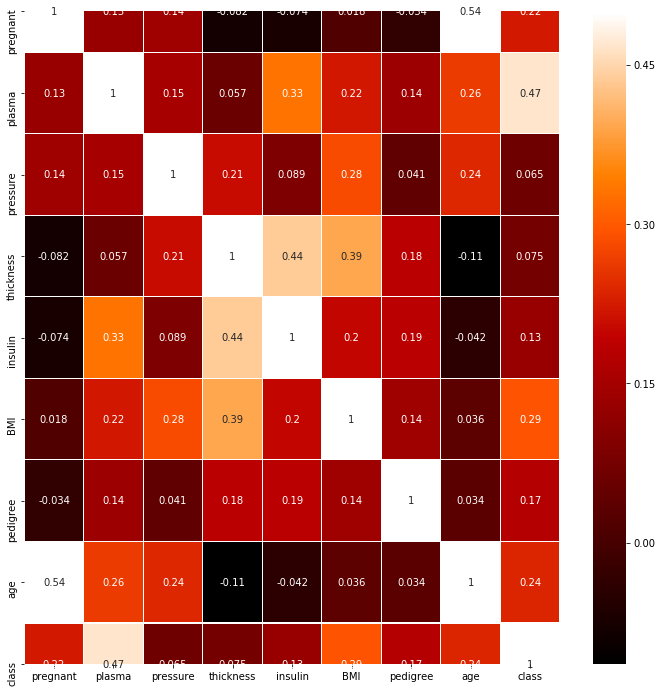

In [0]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

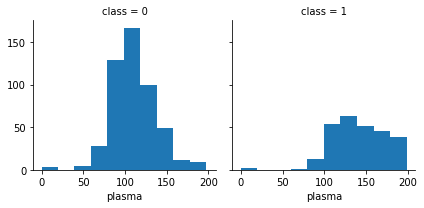

In [0]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
data = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")
X = data[:, 0:8]
Y = data[:, 8]

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
768/768 [==============================] - 0s 125us/step - loss: 0.4827 - acc: 0.7630
Epoch 2/200
768/768 [==============================] - 0s 123us/step - loss: 0.4752 - acc: 0.7721
Epoch 3/200
768/768 [==============================] - 0s 127us/step - loss: 0.4795 - acc: 0.7669
Epoch 4/200
768/768 [==============================] - 0s 120us/step - loss: 0.4878 - acc: 0.7539
Epoch 5/200
768/768 [==============================] - 0s 118us/step - loss: 0.4791 - acc: 0.7786
Epoch 6/200
768/768 [==============================] - 0s 114us/step - loss: 0.4770 - acc: 0.7708
Epoch 7/200
768/768 [==============================] - 0s 117us/step - loss: 0.4667 - acc: 0.7747
Epoch 8/200
768/768 [==============================] - 0s 135us/step - loss: 0.4727 - acc: 0.7773
Epoch 9/200
768/768 [==============================] - 0s 117us/step - loss: 0.4746 - acc: 0.7747
Epoch 10/200
768/768 [==============================] - 0s 132us/step - loss: 0.4796 - acc: 0.7591
Epoch 11/200
768/76

In [0]:
print("\n Accuracy: %.4f" %(model.evaluate(X, Y)[1]))

768/768 [==============================] - 0s 86us/step

 Accuracy: 0.7930
